In [8]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import pickle
#from Creacion_Grafo import Create_Graph_random
from Class_Hormiga import Hormiga_centrality_basic,Hormiga_centrality_basic_progress ,evaluar_tiempo_funcion, Hormiga_centrality_espera, Hormiga_centrality_espera_progress
#from tqdm import tqdm  # Importar la librería tqdm
import numpy as np
import timeit
import itertools
from matplotlib.widgets import Slider
import matplotlib as mpl


In [9]:
#%% Cargar Grafo
with open('grafo_prueba_diamond.obj', 'rb') as file:
    G= pickle.load(file)

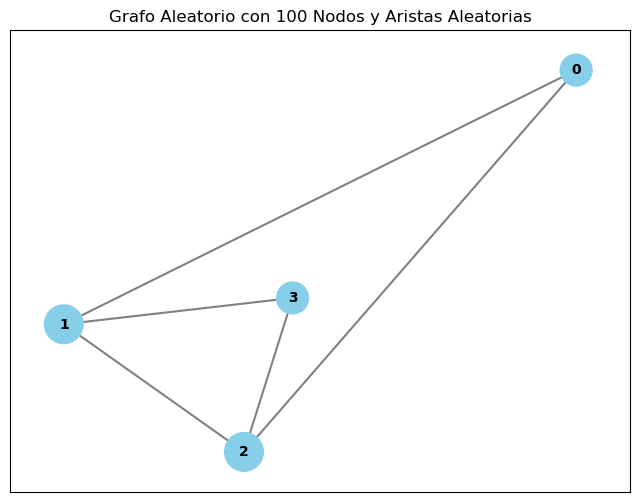

In [10]:
#%% Dibujar Grafo
# Calcular el grado de cada nodo
node_degrees = dict(G.degree())

# Ajustar el tamaño de los nodos en base a su grado
node_sizes = [1000/G.number_of_nodes() * (node_degrees[node] + 0.1) for node in G.nodes()]


# Visualizar el grafo
plt.figure(figsize=(8, 6))
pos = nx.random_layout(G, seed = 1)
nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=1.5)
plt.title('Grafo Aleatorio con 100 Nodos y Aristas Aleatorias', fontsize=12)
plt.show()


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 73.76it/s]


Nodo central Hormigas 2


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 144.48it/s]


Nodo central Hormigas Espera 1


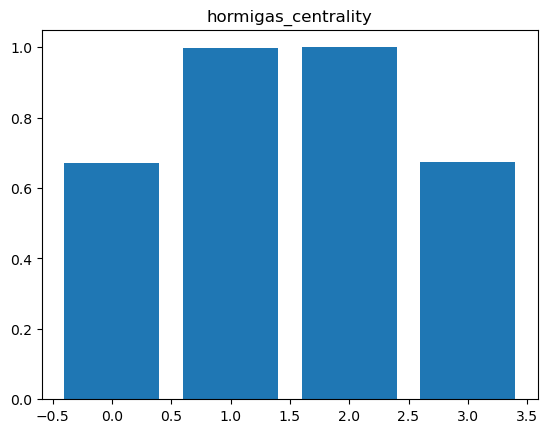

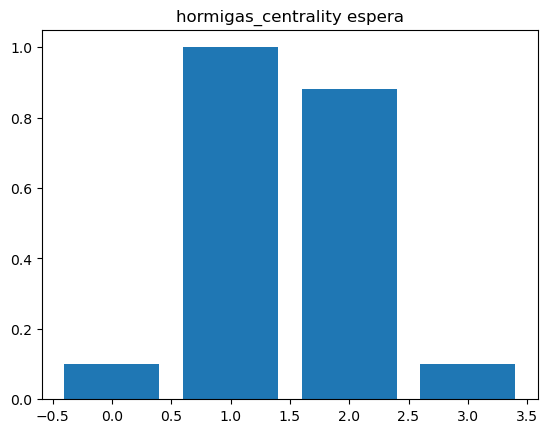

In [11]:
#%% # Calcular estadísticos de centralidad

proporciones_por_simulacion = Hormiga_centrality_basic(G,num_hormigas = 20, steps = 1000, epochs = 100 )
promedio_proporciones = np.mean(proporciones_por_simulacion, axis=0)
desviacion_estandar_proporciones = np.std(proporciones_por_simulacion, axis=0)
print("Nodo central Hormigas", np.argmax(promedio_proporciones))

proporciones_por_simulacion_espera = Hormiga_centrality_espera(G,num_hormigas = 20, steps = 1000, epochs = 100, t_espera=  1)
promedio_proporciones_espera = np.mean(proporciones_por_simulacion_espera, axis=0) 
desviacion_estandar_proporciones = np.std(proporciones_por_simulacion_espera, axis=0)
print("Nodo central Hormigas Espera", np.argmax(promedio_proporciones_espera))
#%%
plt.close("all")
mpl.use('module://matplotlib_inline.backend_inline')
plt.bar(range(len(promedio_proporciones)),promedio_proporciones/max(promedio_proporciones))
plt.title("hormigas_centrality")
plt.show()
plt.bar(range(len(promedio_proporciones_espera)),promedio_proporciones_espera/max(promedio_proporciones_espera))
plt.title("hormigas_centrality espera")
plt.show()


Nodo central degree 1
Nodo central closeness 1
Nodo central betweeness 1
Nodo central eigenvector 1
Nodo central pagerank 1


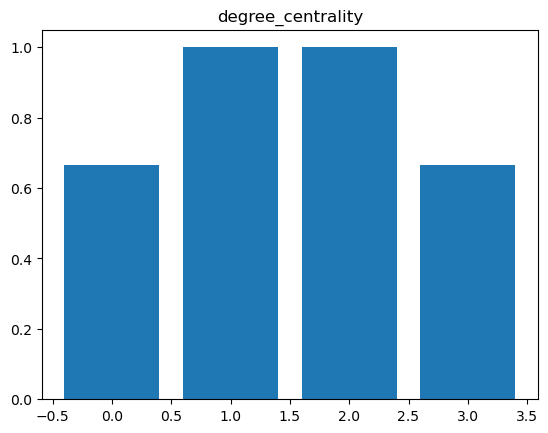

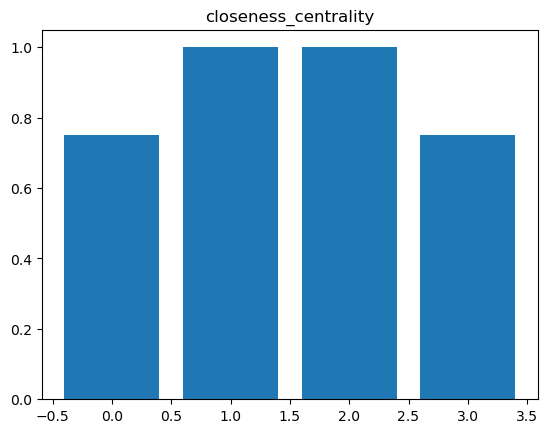

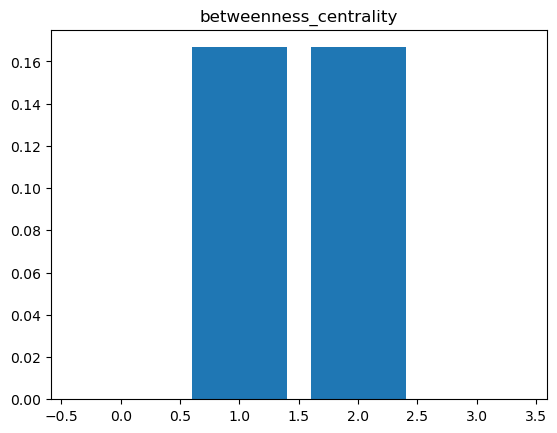

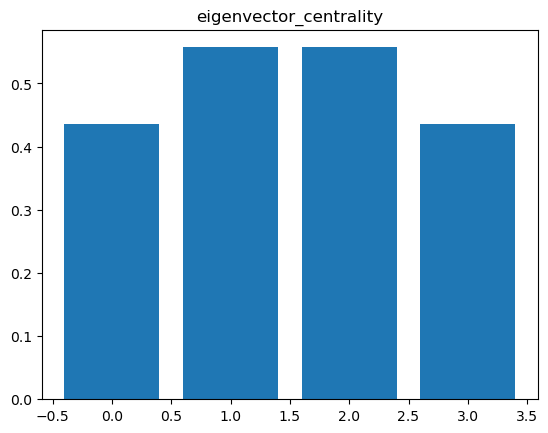

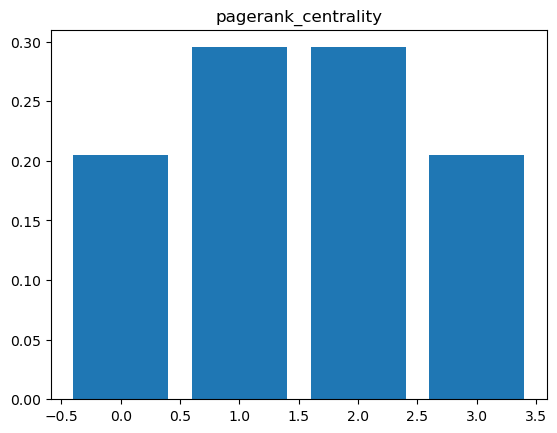

In [12]:

# Imprimir los resultados de los estadísticos de centralidad



degree_centrality = nx.degree_centrality(G)
print("Nodo central degree", np.argmax(list(degree_centrality.values())))
closeness_centrality = nx.closeness_centrality(G)
print("Nodo central closeness",np.argmax(list(closeness_centrality.values())))
betweenness_centrality = nx.betweenness_centrality(G)
print("Nodo central betweeness", np.argmax(list(betweenness_centrality.values())))
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Nodo central eigenvector", np.argmax(list(eigenvector_centrality.values())))
# Calcular el PageRank Centrality
pagerank_centralities = nx.pagerank(G)
print("Nodo central pagerank",np.argmax(list(pagerank_centralities.values())))


plt.bar(list(degree_centrality.keys()),list(degree_centrality.values()))
plt.title("degree_centrality")
plt.show()
plt.bar(list(closeness_centrality.keys()),list(closeness_centrality.values()))
plt.title("closeness_centrality")
plt.show()
plt.bar(list(betweenness_centrality.keys()),list(betweenness_centrality.values()))
plt.title("betweenness_centrality")
plt.show()
plt.bar(list(eigenvector_centrality.keys()),list(eigenvector_centrality.values()))
plt.title("eigenvector_centrality")
plt.show()
plt.bar(list(pagerank_centralities.keys()),list(pagerank_centralities.values()))
plt.title("pagerank_centrality")
plt.show()



In [23]:
# Evolución del histograma
#%matplotlib inline

proporciones_por_step = Hormiga_centrality_espera_progress(G,num_hormigas = 1000, steps = 1000, t_espera = 1)
#proporciones_por_step = Hormiga_centrality_basic_progress(G,num_hormigas = 100, steps = 1000)

mpl.use('WebAgg')
#plt.close("all")

array = proporciones_por_step

def update(val):
    
    st = round(step.val)
    #print(st)
    # Redraw histogram
    ax.cla()
        
    ax.bar(range(len(array[st,])),array[st,])
    plt.draw()

def reset(event):
    
    step.reset()

ax = plt.subplot(111)
plt.subplots_adjust(left=0.25, bottom=0.25)


step0 = 30


plt.bar(range(len(array[step0,])),array[step0,])
plt.title("hormigas_centrality")

axcolor = 'lightgray'
axstep = plt.axes([0.25, 0.1, 0.65, 0.1], facecolor=axcolor)
step = Slider(axstep, 'Step', 0, array.shape[0]-1,valstep=1, valinit=step0,)
step.on_changed(update)

resetax = plt.axes([0.9, 0.025, 0.1, 0.04])
button_reset = plt.Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button_reset.on_clicked(reset)

plt.show()
